In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Set up TensorFlow

In [2]:
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.9.1


### Loading the Dataset

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

### Build a machine learning model

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(436, activation='relu'),
    tf.keras.layers.Dense(123, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [41]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1451 - accuracy: 0.9589 - val_loss: 0.1414 - val_accuracy: 0.9583
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1294 - accuracy: 0.9637 - val_loss: 0.1363 - val_accuracy: 0.9616
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1164 - accuracy: 0.9678 - val_loss: 0.1232 - val_accuracy: 0.9661
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1058 - accuracy: 0.9703 - val_loss: 0.1138 - val_accuracy: 0.9676
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0963 - accuracy: 0.9731 - val_loss: 0.1078 - val_accuracy: 0.9676
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0882 - accuracy: 0.9752 - val_loss: 0.1018 - val_accuracy: 0.9699
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0811 - accuracy: 0.9772 - val_loss: 0.0953 - val_accuracy

In [51]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss = ", test_loss)
print("Accuracy = ", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0871 - accuracy: 0.9728
Loss =  0.08708449453115463
Accuracy =  0.9728000164031982


In [43]:
import random

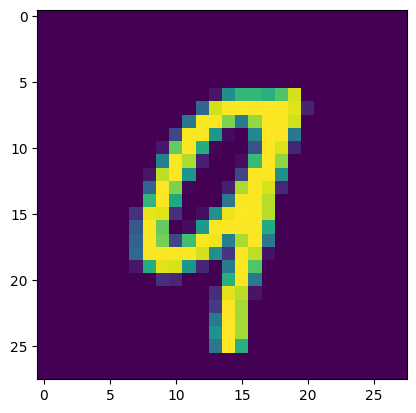

313/313 [==============================] - 1s 3ms/step
The handwritten number in the image is  9


In [44]:
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()
prediction = model.predict(x_test)
print("The handwritten number in the image is ", np.argmax(prediction[n]))

In [45]:
H.history

{'loss': [0.14508652687072754,
  0.1293749064207077,
  0.11639146506786346,
  0.10580962151288986,
  0.09627694636583328,
  0.08824741840362549,
  0.08114951848983765,
  0.07526832073926926,
  0.06929828971624374,
  0.06466291099786758],
 'accuracy': [0.9589499831199646,
  0.9637333154678345,
  0.9678333401679993,
  0.9702833294868469,
  0.9731166958808899,
  0.9751999974250793,
  0.9771666526794434,
  0.9790666699409485,
  0.9807833433151245,
  0.9827499985694885],
 'val_loss': [0.14140817523002625,
  0.13631735742092133,
  0.12316326797008514,
  0.11375556886196136,
  0.10779620707035065,
  0.10179393738508224,
  0.09526517987251282,
  0.09201369434595108,
  0.09153973311185837,
  0.08708449453115463],
 'val_accuracy': [0.958299994468689,
  0.9616000056266785,
  0.9660999774932861,
  0.9675999879837036,
  0.9675999879837036,
  0.9699000120162964,
  0.972000002861023,
  0.9726999998092651,
  0.9725000262260437,
  0.9728000164031982]}

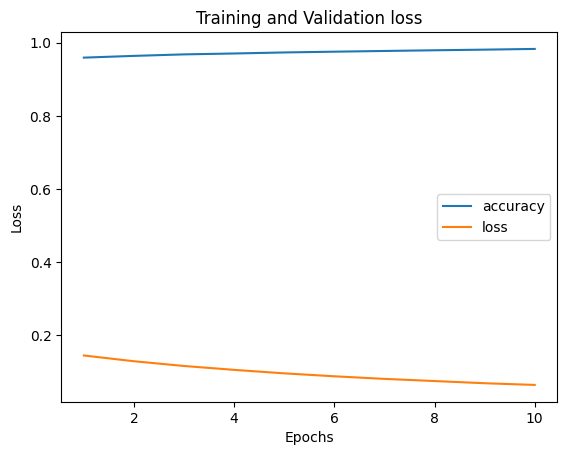

In [46]:
loss_train = H.history['loss']
accuracy = H.history['accuracy']

epochs = np.array([1,2,3,4,5,6,7,8,9,10])
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, loss_train, label='loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()